<a href="https://colab.research.google.com/github/andromeda313/AirLines-tickets/blob/main/AviaTicketPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sbn

#Ma'lumotlarni o'rganish osqichi

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ANDROMEDA_Drive/Portfolio/AviaPrice/train_data.csv', index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


Duplicatga tekshiramiz

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(20000, 11)

NaN va null qiymatlarga tekshiramiz

In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
#Aviakompaniyalar ro'yxati
df.airline.unique()

array(['Vistara', 'SpiceJet', 'Indigo', 'Air_India', 'GO_FIRST',
       'AirAsia'], dtype=object)

In [8]:
#samolyot turlari
df.flight.unique().shape

(1310,)

In [9]:
#uchish vaqtlani aniqlab olamiz
df.departure_time.unique()

array(['Early_Morning', 'Evening', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [10]:
# Uchish manzillari
df.destination_city.unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Hyderabad', 'Chennai', 'Bangalore'],
      dtype=object)

In [11]:
df.corr()
#sonli ustunlar bilan past proporsionallik!!!

,duration,days_left,price
duration,1.000000,-0.020091,0.213158
days_left,-0.020091,1.000000,-0.102545
price,0.213158,-0.102545,1.000000


#Visualization bosqichi

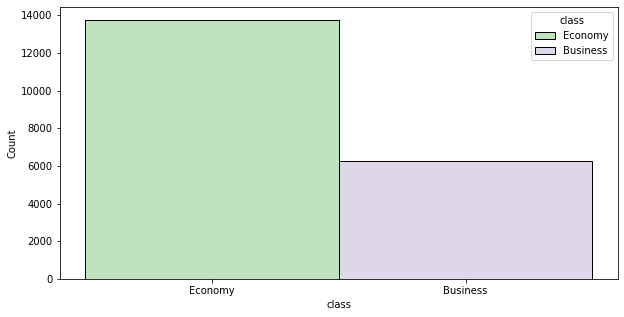

In [ ]:
#Uchish klasslariga talablar 
plt.figure(figsize=(10,5))
sbn.histplot(data= df, x = 'class', hue='class', palette='Accent')
plt.show()

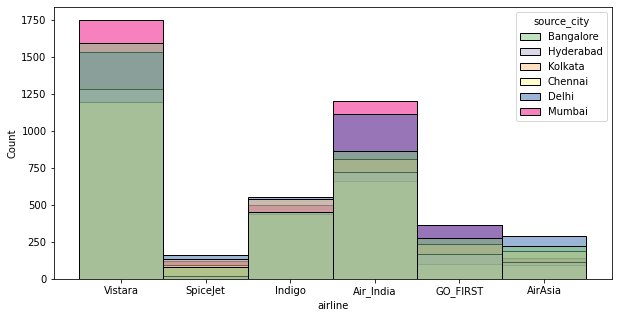

In [ ]:
#Eng ko'p xizmat korsatvchi aviakompaniya uchish manzili kesimida
plt.figure(figsize=(10,5))
sbn.histplot(data= df, x = 'airline', hue='source_city', palette='Accent')
plt.show()

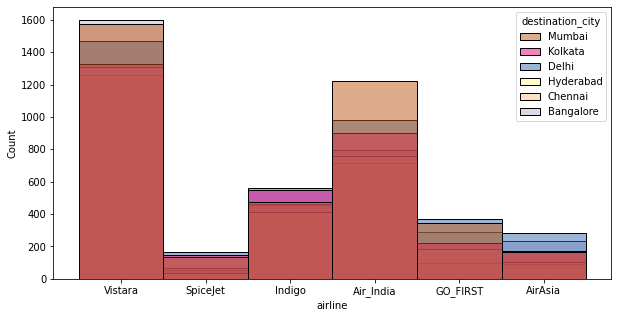

In [ ]:
#Eng ko'p xizmat korsatvchi aviakompaniya qo'nish manzili kesimida
plt.figure(figsize=(10,5))
sbn.histplot(data= df, x = 'airline', hue='destination_city', palette='Accent_r')
plt.show()

In [ ]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292


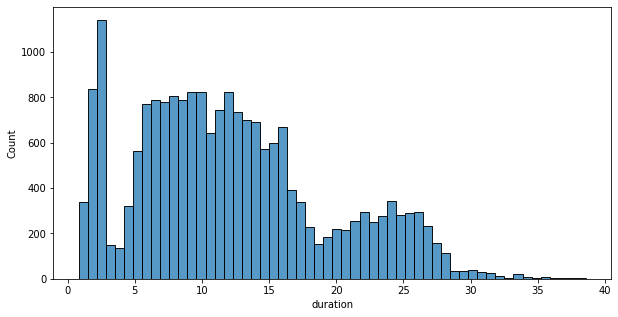

In [ ]:
#uchish davomiyligini ko'rish
plt.figure(figsize=(10,5))
sbn.histplot(data= df, x = 'duration', palette='Accent')
plt.show()

peresadka

In [ ]:
#peresadka qilish
df.stops.value_counts()

one            16666
zero            2440
two_or_more      894
Name: stops, dtype: int64

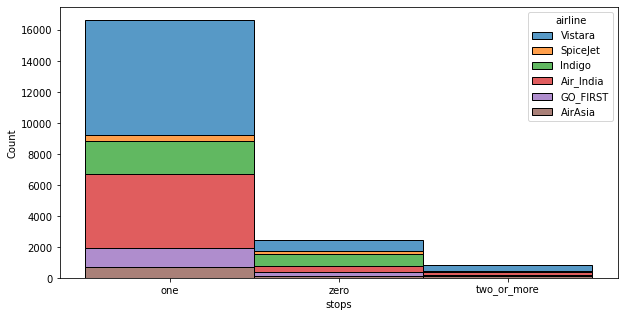

In [ ]:
plt.figure(figsize=(10,5))
sbn.histplot(data= df, x = 'stops', hue = 'airline', multiple='stack')
plt.show()

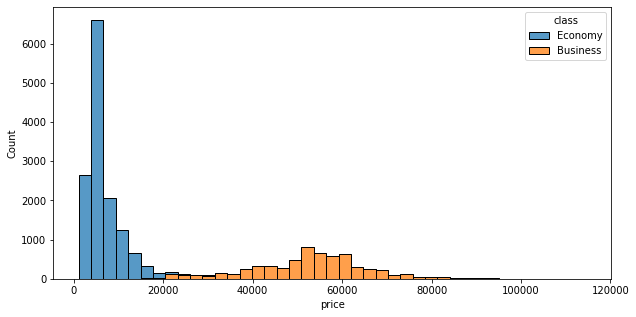

In [ ]:
#Narxlar vizualizasiyasi
plt.figure(figsize=(10,5))
sbn.histplot(data= df, x = 'price', hue = 'class', multiple='stack')
plt.show()

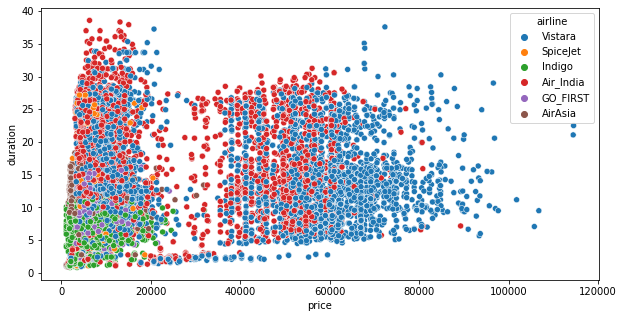

In [ ]:
#uchish davomiyligining narxga bog'liqligi
plt.figure(figsize=(10,5))
sbn.scatterplot(data= df, x = 'price', y = 'duration', hue = 'airline')
plt.show()

In [ ]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212


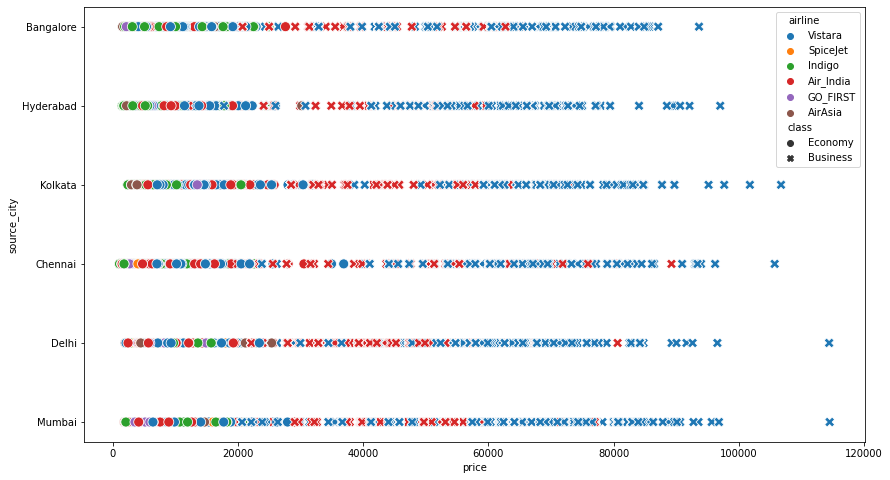

In [ ]:
plt.figure(figsize=(14,8))
sbn.scatterplot(data= df, x = 'price', y = 'source_city', hue  = 'airline', style = 'class', s = 100)
plt.show()

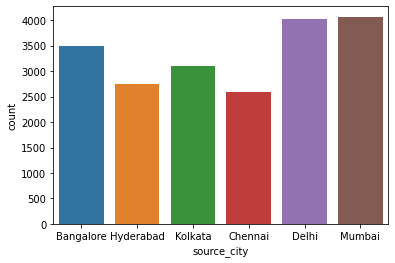

In [ ]:
#Eng kup uchish soni
sbn.countplot(data=df, x = 'source_city')
plt.show()

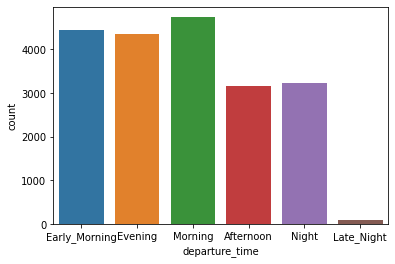

In [ ]:
#Uchish vaqtlari
sbn.countplot(data=df, x = 'departure_time')
plt.show()

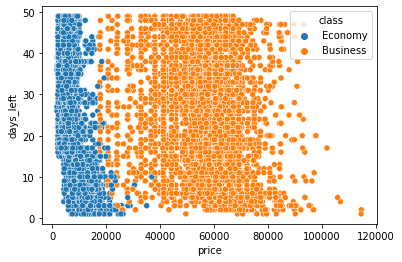

In [ ]:
sbn.scatterplot(data= df[(df['airline']=='Vistara')], x='price', y= 'days_left', hue = 'class')
plt.show()

In [ ]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212


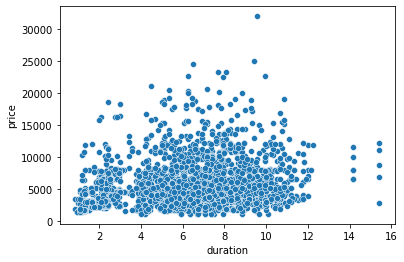

In [ ]:
sbn.scatterplot(data=df[(df['class']=='Economy')&(df['airline']=='Indigo')], x = 'duration', y = 'price')
plt.show()

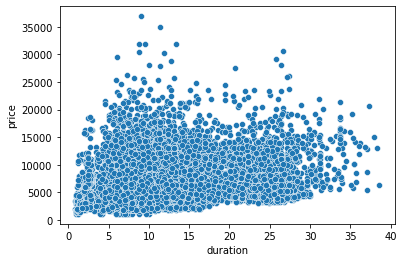

In [ ]:
sbn.scatterplot(data=df[df['class']=='Economy'], x = 'duration', y = 'price')
plt.show()

#MachineLearning bosqichi

In [ ]:
df.shape

(20000, 11)

In [12]:
#Train va testga ajratib olamiz
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2, random_state=27)

In [13]:
# train ni X va Y larini aniqlashtirib olamiz
X = train_set.drop('price', axis = 1)
Y = train_set['price'].copy()

X2 = df.drop('price', axis = 1)
Y2 = df['price'].copy()

X.shape

(16000, 10)

In [14]:
#Matnli ustunlar  va normalizasiya uchun
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212


In [16]:
#matnli va sonli ustunlarni belgilab olamiz
from sklearn.compose import ColumnTransformer

num_attributs = ['duration', 
                 'days_left']
cat_attributs = ['airline',
                 'source_city',
                 'departure_time', 
                 'stops', 
                 'arrival_time',
                 'destination_city',
                 'class']
num_attributs, cat_attributs

(['duration', 'days_left'],
 ['airline',
  'source_city',
  'departure_time',
  'stops',
  'arrival_time',
  'destination_city',
  'class'])

In [17]:
#Normalizasiya uchun konveyer
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [18]:
#Normalizasiya va categoriyalash
full_pipeline = ColumnTransformer([
                                  ('num', num_pipeline, num_attributs), #Normalizasiyalash
                                  ('cat', OneHotEncoder(), cat_attributs) #Categoriyalash
])


In [19]:
# train_set ni X ni tayyorlab olamiz
air_pipeline= full_pipeline.fit_transform(X2)
air_pipeline

<20000x37 sparse matrix of type '<class 'numpy.float64'>'
	with 180000 stored elements in Compressed Sparse Row format>

#MODEL - LinearRegression

In [20]:
#Chiziqli regressiyadan boshlaymiz
from sklearn.linear_model import LinearRegression
LR_model= LinearRegression()
LR_model.fit(air_pipeline, Y2)

LinearRegression()

In [21]:
#test_set imizdagi qiymatlarni basorat qilib kuraylik
x_test = test_set.drop('price', axis = 1)
y_test = test_set.price.loc[x_test.index]

In [22]:
# test_set ni x_test qiymatlarini normallashtirib kategoriyaga ajratib olamiz
test_pipeline = full_pipeline.fit_transform(x_test)

In [23]:
# Bashorat qilamiz
predict_y = LR_model.predict(test_pipeline)

In [24]:
#bir tomosha qilaylik endi
pd.DataFrame({
    'Bashorat':predict_y, 
    'Asl_qiymat':y_test
})

,Bashorat,Asl_qiymat
id,,
13177,10655.154563,9178
10867,6140.539546,4079
13310,55070.837183,53152
8881,12999.944142,7412
14168,3887.472802,3977
...,...,...
6732,6568.239557,3336
11862,53174.076418,57393
8931,-1497.951503,4454


LR_model Modelini baholaymiz

In [25]:
#modelni baholab kuraylik
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predict_y)
MAE

4503.996353035115

#RandomFOREST modeli

In [26]:
#Random_Forest ni ham sinab ko'raylik
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(air_pipeline, #20 000 ta qiymat bor(train)
             Y2)

RandomForestRegressor()

In [27]:
# test_pipeline LinearRegression da qayta ishlangan edi(Test qismi=4000 ta qiymat)
RF_predict = RF_model.predict(test_pipeline)

*RF_model ni baholaymiz*
:



In [28]:
#Yomon emas shekilli
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, RF_predict)
MAE

878.133203218254

RF_modelni Cross_validation da baholaymiz

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, 
                         test_pipeline,
                         y_test,
                         scoring='neg_mean_squared_error',
                         cv = 10)

In [30]:
np.sqrt(-scores).mean(), scores, scores.std()

(4282.515380469717,
 array([-19735811.64009786, -20533638.70827196, -12495970.92559339,
        -26955838.47578875, -17638014.20024264, -26143047.84626607,
        -16686023.87157662, -18252145.27747649, -14781615.3170675 ,
        -13030646.31592627]),
 4683021.492448095)

# Boshqa modellarni ham sinab ko'raylik

#Ridge modeli

In [32]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge()
Ridge_model.fit(air_pipeline,Y2)
Ridge_predict = Ridge_model.predict(test_pipeline)

In [33]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, Ridge_predict)
MAE

4504.116137133563

#SGDRegressor modeli

In [34]:
from sklearn.linear_model import SGDRegressor
SGDR_model = SGDRegressor()
SGDR_model.fit(air_pipeline,Y2)
SGDR_predict = SGDR_model.predict(test_pipeline)

In [35]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, SGDR_predict)
MAE

4501.938268369798

#Lasso-model

In [36]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso()
Lasso_model.fit(air_pipeline,Y2)
Lasso_predict = Lasso_model.predict(test_pipeline)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, Lasso_predict)
MAE

4502.0403028645305

#Really TEST.(RandomForest modelidan foydalanamiz)

In [37]:
df2 = pd.read_csv('/content/drive/MyDrive/ANDROMEDA_Drive/Portfolio/AviaPrice/test_data.csv', index_col=0)
df2.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2


Demak test bor natija yuq

In [38]:
#konveyerdan o'tkazamiz
test_df_pipline = full_pipeline.fit_transform(df2)

#bashorat
test_df_RF_predict = RF_model.predict(test_df_pipline)

In [39]:
#qiymatlar bir xilmidi o'zi?
len(test_df_RF_predict), len(df2)

(5000, 5000)

In [40]:
#Ularni yozishga tayyorlaymiz
finally_pred = pd.DataFrame({'id':df2.index, "price":test_df_RF_predict})
finally_pred.head()

,id,price
0,1,53318.61
1,2,55525.99
2,3,22809.54
3,4,2931.84
4,5,5698.73


In [43]:
finally_pred.to_csv('/content/drive/MyDrive/ANDROMEDA_Drive/Portfolio/AviaPrice/predict_RF.csv', index=False)